In [61]:
%pylab inline
import pandas as pd
import seaborn as sb
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pandas.read_csv('C:/Users/srija/Desktop/BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
data.dropna()
;

''

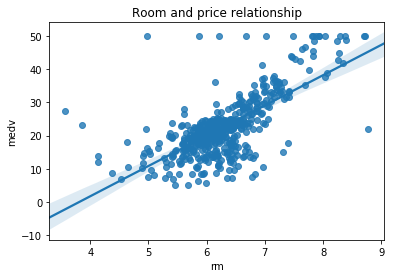

In [12]:
sb.regplot(x='rm', y='medv', data=data, fit_reg=True)
plt.title('Room and price relationship')
plt.show()

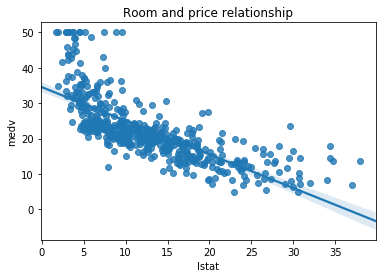

In [13]:
sb.regplot(x='lstat', y='medv', data=data, fit_reg=True)
plt.title('Room and price relationship')
plt.show()

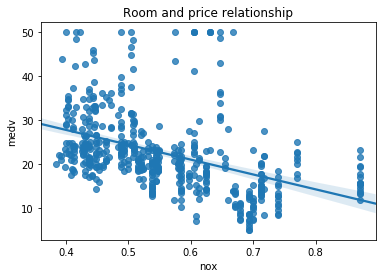

In [14]:
sb.regplot(x='nox', y='medv', data=data, fit_reg=True)
plt.title('Room and price relationship')
plt.show()

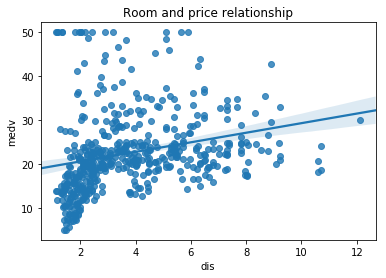

In [15]:
sb.regplot(x='dis', y='medv', data=data, fit_reg=True)
plt.title('Room and price relationship')
plt.show()

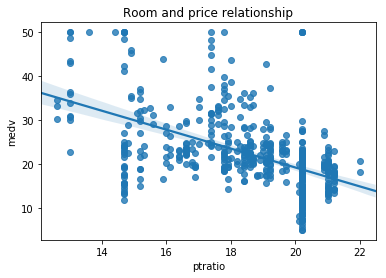

In [16]:
sb.regplot(x='ptratio', y='medv', data=data, fit_reg=True)
plt.title('Room and price relationship')
plt.show()

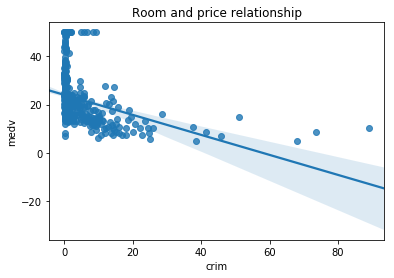

In [17]:
sb.regplot(x='crim', y='medv', data=data, fit_reg=True)
plt.title('Room and price relationship')
plt.show()

''

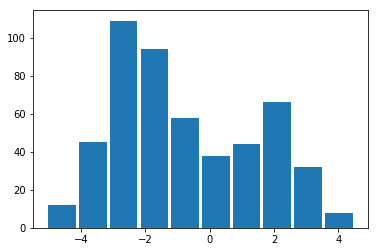

In [21]:
plt.hist(np.log(data.crim), rwidth=0.9)
;

''

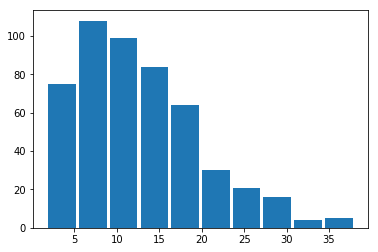

In [27]:
plt.hist(data.lstat, rwidth=0.9)
;

''

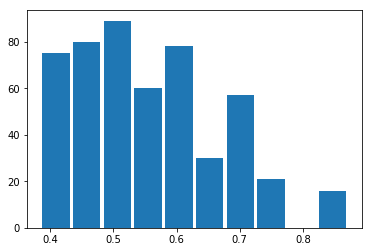

In [25]:
plt.hist(data.nox, rwidth=0.9)
;

''

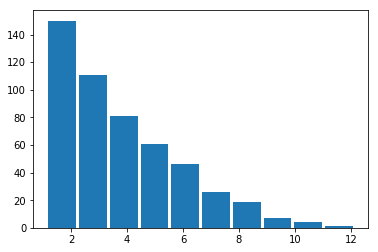

In [26]:
plt.hist(data.dis, rwidth=0.9)
;

''

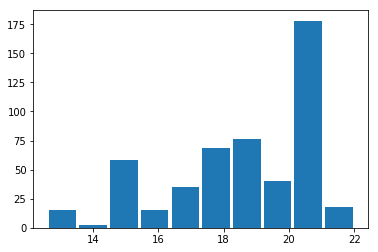

In [28]:
plt.hist(data.ptratio, rwidth=0.9)
;

In [30]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [33]:
selected_var_df = data.iloc[:,[0,4,5,7,10,12]]
selected_var_df.head()

,crim,nox,rm,dis,ptratio,lstat
0,0.00632,0.538,6.575,4.0900,15.3,4.98
1,0.02731,0.469,6.421,4.9671,17.8,9.14
2,0.02729,0.469,7.185,4.9671,17.8,4.03
3,0.03237,0.458,6.998,6.0622,18.7,2.94
4,0.06905,0.458,7.147,6.0622,18.7,5.33


In [34]:
selected_var_df['crim'] = np.log(selected_var_df.crim)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
selected_var_df.corr()

,crim,nox,rm,dis,ptratio,lstat
crim,1.000000,0.788616,-0.306943,-0.681903,0.389554,0.626615
nox,0.788616,1.000000,-0.302188,-0.769230,0.188933,0.590879
rm,-0.306943,-0.302188,1.000000,0.205246,-0.355501,-0.613808
dis,-0.681903,-0.769230,0.205246,1.000000,-0.232471,-0.496996
ptratio,0.389554,0.188933,-0.355501,-0.232471,1.000000,0.374044
lstat,0.626615,0.590879,-0.613808,-0.496996,0.374044,1.000000


In [36]:
selected_var_df['price'] = data.medv

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
model = ols('price ~ crim + nox + rm + dis + ptratio + lstat',selected_var_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     202.6
Date:                Fri, 14 Feb 2020   Prob (F-statistic):          2.90e-130
Time:                        22:37:24   Log-Likelihood:                -1528.0
No. Observations:                 506   AIC:                             3070.
Df Residuals:                     499   BIC:                             3100.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.4341      5.207      7.765      0.000      30.203      50.665
crim           0.2311      0.191      1.213      0.226      -0.143       0.605
nox          -20.4257      3.826     -5.339      0.000     -27.942     -12.910
rm             4.0961      0.416      9.857      0.000       3.280       4.913
dis           -1.1584      0.170     -6.825      0.000      -1.492      -0.825
ptratio       -1.0941      0.120     -9.098      0.000      -1.330      -0.858
lstat         -0.5964      0.050    -12.037      0.000      -0.694      -0.499
==============================================================================
Omnibus:                      177.118   Durbin-Watson:                   0.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.470
Skew:                           1.508   Prob(JB):                    1.01e-171
Kurtosis:                       8.316   Cond. No.                         640.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
predicted_prices = model.fittedvalues

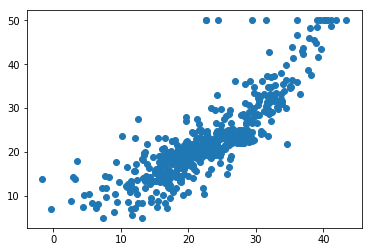

In [48]:
plt.scatter(predicted_prices, selected_var_df.price)

In [54]:
error = np.sqrt(mean_squared_error(predicted_prices, selected_var_df.price))
error

4.9568674667600074

In [57]:
x = selected_var_df.drop('price', axis=1)
y = selected_var_df.price

In [58]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.3, random_state = 3)

In [63]:
LR = LinearRegression()
LR.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

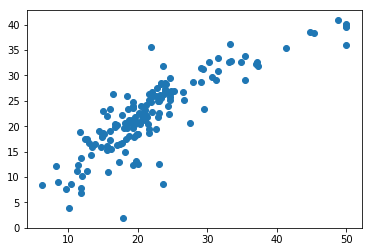

In [65]:
ypred = LR.predict(xtest)
plt.scatter(ytest, ypred)

In [66]:
np.sqrt(mean_squared_error(ytest, ypred))


4.633953533190311